In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('test.csv')
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [4]:
df.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [5]:
import seaborn as sns
numerical_columns = df.select_dtypes(include=['int64','float64']).columns

In [6]:
numerical_columns

Index(['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

this plot show the outoutliers in each column After delete them


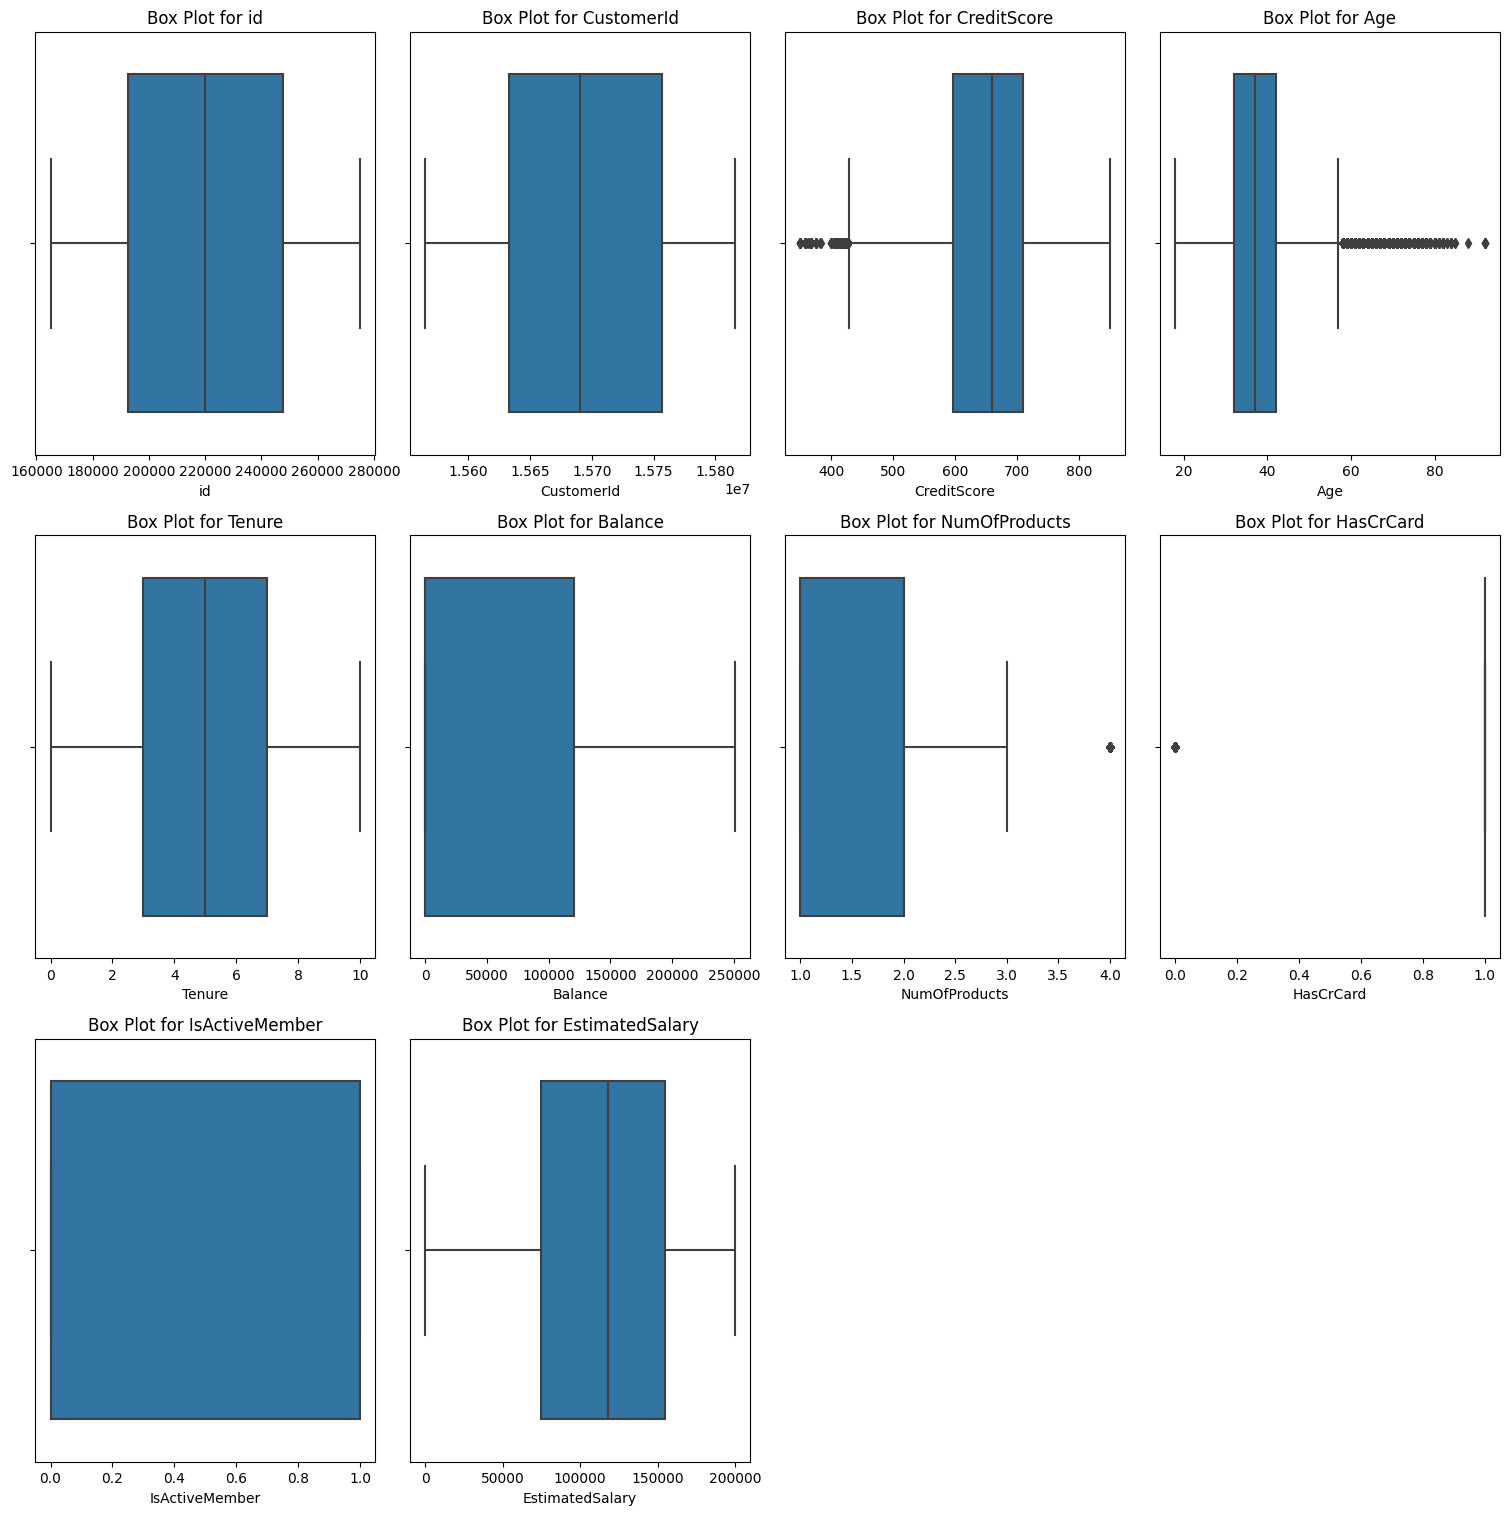

In [7]:
print("this plot show the outoutliers in each column After delete them")

# Determine the number of rows and columns for the grid layout
num_features = len(numerical_columns)
num_rows = 8  # Set the number of rows
num_cols = 4  # Set the number of columns

# Calculate the figure size based on the number of rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 40))

# Flatten the axes array to simplify indexing
'''
subplot returns a 2D index matrix to access the figures so when we flatten it inot 1D it's easier to access
'''
axes = axes.flatten()

# Iterate over numerical features and create individual box plots in subplots
for i, column in enumerate(numerical_columns):
    if i < num_features:
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'Box Plot for {column}')


# Remove empty subplots (8*5 = 40 but we have only 37 features to plot)
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Surname'] = encoder.fit_transform(df['Surname'])
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Geography'] = encoder.fit_transform(df['Geography'])

In [13]:
import joblib

In [14]:
model = joblib.load('model4.pkl')

In [15]:
# Make predictions on the validation set
y_pred_proba = model.predict_proba(df)[:, 1]

In [16]:
y_pred_proba.shape

(110023,)

In [ ]:
submission_df = pd.DataFrame({'id': df['id'], 'Exited': y_pred_proba})

# Save the DataFrame to a CSV file for submission
submission_df.to_csv('submission4.csv', index=False)